##### Load data

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Load the processed data
import sys
sys.path.append("../scripts")
from data_preprocessing import X_train, y_train

# Verify the data
print(X_train.head())
print(X_train.info())


         crim        zn     indus  chas     nox        rm       age       dis  \
261  0.283238  0.989658 -0.881309     0  0.6470  2.603831  0.963519 -1.133272   
294 -0.528138 -0.577904  0.864913     0  0.4370 -0.525271 -0.805726  0.776444   
281 -0.608785  0.989658 -0.993629     0  0.4429  1.460704 -0.997300  0.629932   
84  -0.584487 -0.577904 -0.790049     0  0.4490  0.261664 -0.591613  0.365698   
26   0.530510 -0.577904 -0.149475     0  0.5380 -0.931164  0.997326  0.310387   

          rad       tax   ptratio         b     lstat  lstat_squared  \
261  0.273858 -0.725344 -2.440627  0.187186 -0.747895       0.559348   
294 -0.365874 -0.355271 -1.012063  0.394067 -0.062720       0.003934   
281  0.273858 -1.435885 -1.535870  0.280804 -1.330513       1.770264   
84  -1.005605 -0.976994  0.178407  0.394067 -0.232923       0.054253   
26  -0.365874 -0.088818  1.368878 -0.091484  0.899580       0.809245   

     rm_lstat_interaction   log_dis  
261             -1.947394       NaN  
294 

##### Create new feature

In [6]:
# Create polynomial features
X_train['lstat_squared'] = X_train['lstat'] ** 2

# Create interaction features
X_train['rm_lstat_interaction'] = X_train['rm'] * X_train['lstat']

# Apply log transformation to skewed variables
X_train['log_dis'] = np.log1p(X_train['dis'])  # log(1 + DIS)

# Verify the new features
print(X_train.head())


         crim        zn     indus  chas     nox        rm       age       dis  \
261  0.283238  0.989658 -0.881309     0  0.6470  2.603831  0.963519 -1.133272   
294 -0.528138 -0.577904  0.864913     0  0.4370 -0.525271 -0.805726  0.776444   
281 -0.608785  0.989658 -0.993629     0  0.4429  1.460704 -0.997300  0.629932   
84  -0.584487 -0.577904 -0.790049     0  0.4490  0.261664 -0.591613  0.365698   
26   0.530510 -0.577904 -0.149475     0  0.5380 -0.931164  0.997326  0.310387   

          rad       tax   ptratio         b     lstat  lstat_squared  \
261  0.273858 -0.725344 -2.440627  0.187186 -0.747895       0.559348   
294 -0.365874 -0.355271 -1.012063  0.394067 -0.062720       0.003934   
281  0.273858 -1.435885 -1.535870  0.280804 -1.330513       1.770264   
84  -1.005605 -0.976994  0.178407  0.394067 -0.232923       0.054253   
26  -0.365874 -0.088818  1.368878 -0.091484  0.899580       0.809245   

     rm_lstat_interaction   log_dis  
261             -1.947394       NaN  
294 

c:\Users\SHYAM PANDIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Handle missing values

In [11]:
# Check for missing values
print(X_train.isnull().sum())

# Total missing values
print(f"Total missing values: {X_train.isnull().sum().sum()}")
# Drop rows with missing values
# Combine X_train and y_train into a single DataFrame for alignment
train_data = X_train.copy()
train_data["target"] = y_train

# Drop rows with missing values
train_data = train_data.dropna()

# Separate X_train and y_train again
X_train = train_data.drop(columns=["target"])
y_train = train_data["target"]

# Check shapes to ensure alignment
print("X_train shape after dropping NaNs:", X_train.shape)
print("y_train shape after dropping NaNs:", y_train.shape)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# Check again for missing values
print(X_train.isnull().sum())



crim                    0
zn                      0
indus                   0
chas                    0
nox                     0
rm                      0
age                     0
dis                     0
rad                     0
tax                     0
ptratio                 0
b                       0
lstat                   0
lstat_squared           0
rm_lstat_interaction    0
log_dis                 0
dtype: int64
Total missing values: 0
X_train shape after dropping NaNs: (99, 16)
y_train shape after dropping NaNs: (99,)
crim                    0
zn                      0
indus                   0
chas                    0
nox                     0
rm                      0
age                     0
dis                     0
rad                     0
tax                     0
ptratio                 0
b                       0
lstat                   0
lstat_squared           0
rm_lstat_interaction    0
log_dis                 0
dtype: int64


##### Test different feature

In [12]:

# Define a function to train and evaluate a model
def evaluate_features(X, y, features):
    model = LinearRegression()
    scores = cross_val_score(model, X[features], y, cv=5, scoring='neg_mean_squared_error')
    return np.mean(-scores)  # Return positive MSE

# Compare models with and without the new features
original_features = ['rm', 'lstat', 'dis']
new_features = original_features + ['lstat_squared', 'rm_lstat_interaction', 'log_dis']

original_mse = evaluate_features(X_train, y_train, original_features)
new_mse = evaluate_features(X_train, y_train, new_features)

print(f"Original MSE: {original_mse}")
print(f"New MSE with added features: {new_mse}")


Original MSE: 38.33176232644221
New MSE with added features: 37.57465226251689


##### Evaluate the impact

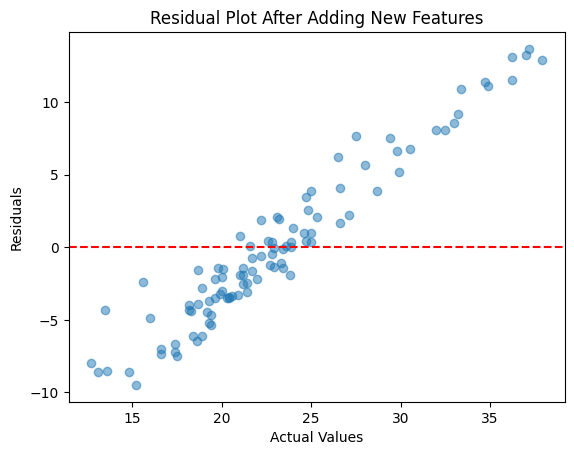

In [13]:
# Fit the model with new features
model = LinearRegression()
model.fit(X_train[new_features], y_train)
y_pred = model.predict(X_train[new_features])

# Plot residuals
plt.scatter(y_train, y_train - y_pred, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot After Adding New Features')
plt.show()
